## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [1]:
import pandas as pd #import library

In [2]:
titanic = pd.read_csv('titanic.csv')  #read dataset

In [3]:
titanic.head()  #the first 5 row from dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull().sum()  #Cheking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.describe()   #summary of dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Define Hypotheses**

Hypothesis 1: Determine if the survival rate is associated with the class of passenger.

    H0: The class of passenger does not affect the survival rate.
    H1: The class of passenger affects the survival rate.

Hypothesis 2: Determine if the survival rate is associated with gender.

    H0: Gender does not affect the survival rate. 
    H1: Gender affects the survival rate.

Hypothesis 3: Determine if the survival rate is associated with age.

    H0: Age does not affect the survival rate.
    H1: Age affects the survival rate.

In [6]:
"""Determine if the survival rate is associated to the class of passenger"""
survival_pclass = titanic.groupby('Pclass')['Survived'].mean()
print(survival_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [15]:
# Create a contingency table of survival and passenger class
contingency_table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


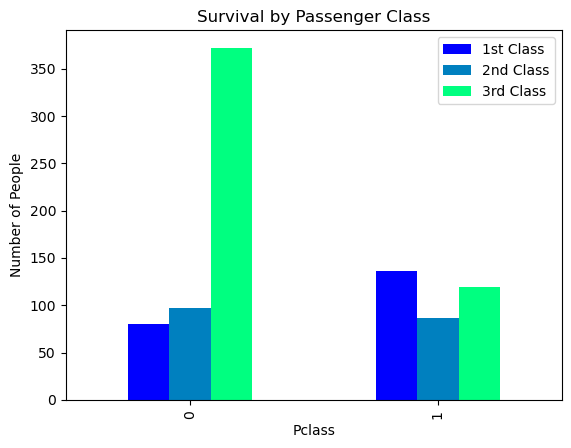

In [16]:
# Creating an unstacked bar plot

plot=contingency_table.plot(kind='bar', stacked=False, colormap='winter')

plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.title('Survival by Passenger Class')
plt.legend(labels=['1st Class', '2nd Class', '3rd Class'])

for i in plot1.containers:
    plot1.bar_label(i, label_type='edge', fontsize=12, color='darkblue')

# The plot
plt.show()

In [12]:
from scipy.stats import chi2_contingency
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 102.88898875696056
P-value: 4.549251711298793e-23


In [33]:
"""Determine if the survival rate is associated to the gender"""
survival_gender = titanic.groupby('Sex')['Survived'].mean()
print(survival_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [26]:
# Create a contingency table of survival and gender
contingency_table_sg = pd.crosstab(titanic['Survived'], titanic['Sex'])
contingency_table_sg

Sex,female,male
Survived,,
0,81,468
1,233,109


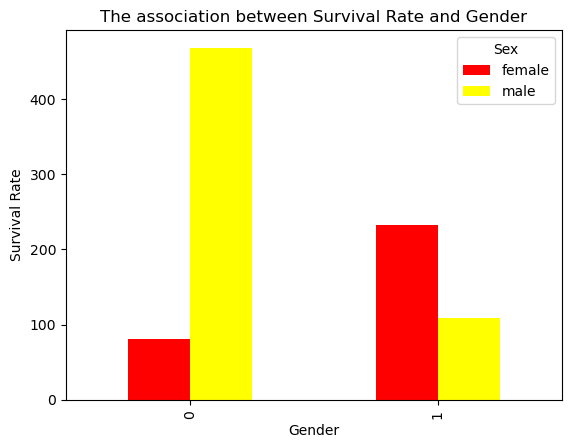

In [25]:
#Creating a barchart
contingency_table_sg.plot(kind = 'bar', colormap = 'autumn')
plt.title("The association between Survival Rate and Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

In [45]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 260.71702016732104
P-value: 1.1973570627755645e-58


In [32]:
"""Determine the survival rate is associated to the age"""
age_bins = [0, 18, 35, 60, 100]
age_labels = ['0-18', '19-35', '36-60', '61+']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

survival_age = titanic.groupby('AgeGroup')['Survived'].mean()
print(survival_age)

AgeGroup
0-18     0.503597
19-35    0.382682
36-60    0.400000
61+      0.227273
Name: Survived, dtype: float64


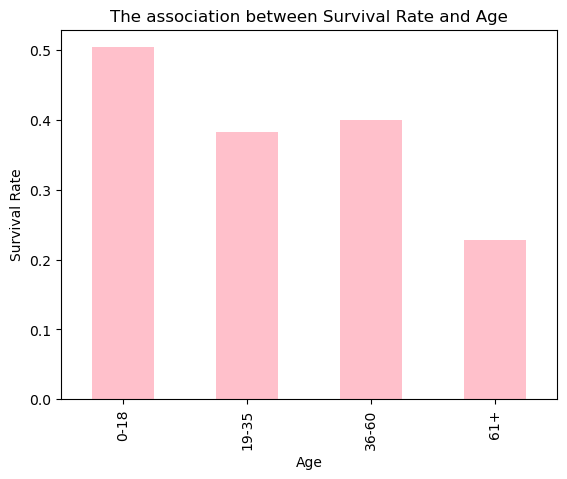

In [35]:
#Creating a barchart
survival_age.plot(kind = 'bar', color = 'pink')
plt.title('The association between Survival Rate and Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

In [54]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 104.15604988902831
P-value: 0.10141111018860959
